In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [61]:
os.getcwd()

'C:\\Users\\Vishaal\\Documents\\GitHub\\TREC_Distributed_Machine_Learning\\TREC\\10_Data\\20_Extracted Tweets\\15_2018 Test'

In [65]:
os.chdir('../10_Data/20_Extracted Tweets/15_2018 Test')

FileNotFoundError: [WinError 3] The system cannot find the path specified: '../10_Data/20_Extracted Tweets/15_2018 Test'

In [ ]:
df = pd.read_csv('Ultimate_Dataframe_TREC_2018_test.csv')

In [66]:
df.sample(5)

,Unnamed: 0,ID,Tweet,Event,Retweet_Count,Follower_Count,Source,User_Created_at,Tweet_Created_at,User_Language,User_Screen_Name,User_Location,Event_Decrption,Categories,Priority
15720,15720,400928414926127104,RT @oxfamgb: #Haiyan latest: 11.5 million peop...,typhoonYolanda2013,62,371,"<a href=""http://twitter.com/download/iphone"" r...",2013-04-12 11:13:54,2013-11-14 10:09:17,en,OxfamMusicEXE,"97 SOUTH ST, EXETER, DEVON, UK","Typhoon Haiyan, known as Super Typhoon Yolanda...","['Donations', 'Factoid', 'Hashtags', 'News']",Medium
1594,1594,323919605171122177,"RT @aceYthekidd: Us: ""You hear bout that shit ...",bostonBombings2013,1,364,"<a href=""http://twitter.com/download/iphone"" r...",2009-05-06 21:42:09,2013-04-15 22:03:46,en,BelieveInLamon,Lost in the world,"During the annual Boston Marathon on April 15,...","['Sentiment', 'Irrelevant']",Low
4703,4703,592069854913536001,Terrible. https://t.co/j4UD5src9M,nepalEarthquake2015,0,197,"<a href=""http://twitter.com/download/android"" ...",2011-05-31 20:44:07,2015-04-25 20:57:08,es,cristina_arpon,Spain,The April 2015 Nepal earthquake (also known as...,['Irrelevant'],Low
10761,10761,233108087530192896,RT @BruroMars: #bangonPilipinas #reliefPH Keep...,philipinnesFloods2012,817,296,"<a href=""http://twitter.com/download/iphone"" r...",2010-08-22 14:26:15,2012-08-08 07:51:13,en,AlvinCee,Philippines,The 2012 Luzon southwest monsoon floods were a...,"['ThirdPartyObservation', 'News']",Low
12365,12365,541379957860364288,Communist party orders NPA to help Ruby victim...,typhoonHagupit2014,0,428,"<a href=""http://allpinoynews.com"" rel=""nofollo...",2014-10-11 12:38:04,2014-12-06 23:53:34,en,allpinoynews,Philippines,"Typhoon Hagupit, known in the Philippines as T...","['ThirdPartyObservation', 'ServiceAvailable', ...",Low


In [67]:
df.dtypes

Unnamed: 0                   int64
ID                           int64
Tweet                       object
Event                       object
Retweet_Count                int64
Follower_Count               int64
Source                      object
User_Created_at     datetime64[ns]
Tweet_Created_at    datetime64[ns]
User_Language               object
User_Screen_Name            object
User_Location               object
Event_Decrption             object
Categories                  object
Priority                    object
dtype: object

In [68]:
df.shape

(15865, 15)

In [69]:
'''
    Converting cols to datetime data type
'''
df['User_Created_at'] = df['User_Created_at'].astype('datetime64')
df['Tweet_Created_at'] = df['Tweet_Created_at'].astype('datetime64')

In [70]:
'''
    Converting cols to str data type
'''
df['Source'] = df['Source'].astype('str')
df['Event'] = df['Event'].astype('str')

In [71]:
'''
    Source (device iphone, andorid etc) and user_location have Nans
'''
df.isna().any()

Unnamed: 0          False
ID                  False
Tweet               False
Event               False
Retweet_Count       False
Follower_Count      False
Source              False
User_Created_at     False
Tweet_Created_at    False
User_Language       False
User_Screen_Name    False
User_Location        True
Event_Decrption     False
Categories          False
Priority            False
dtype: bool

In [72]:
'''
    We seem to have tweets from 2011, 12, 13, 14, 15 and 18
'''
df['Tweet_Created_at'].dt.year.unique()

array([2013, 2014, 2018, 2012, 2011, 2015], dtype=int64)

In [73]:
df['Tweet_Created_at'].dt.month_name().apply(lambda x:x).value_counts()

April       5141
December    3743
November    2732
February    1158
August       848
October      675
January      673
June         662
May          155
July          78
Name: Tweet_Created_at, dtype: int64

In [74]:
df['Tweet_Created_at'].dt.weekday_name.apply(lambda x:x).value_counts()


Saturday     3973
Sunday       3897
Monday       3078
Tuesday      1747
Friday       1201
Thursday     1029
Wednesday     940
Name: Tweet_Created_at, dtype: int64

In [75]:
s_hourct = df['Tweet_Created_at'].dt.hour.apply(lambda x:x).value_counts()
s_hourct = s_hourct.sort_index()

Text(0.5, 0, 'Hour of the Day')

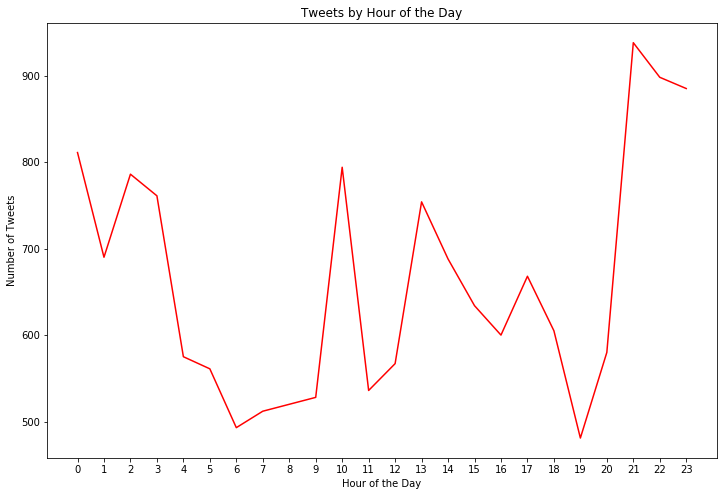

In [76]:
'''
    Huge average influx of tweets at 7 AM
'''
plt.figure(figsize=(12,8))
plt.plot(s_hourct.index, s_hourct, 'r')
plt.ylabel('Number of Tweets')
plt.xticks(np.arange(0,24))
plt.title('Tweets by Hour of the Day')
plt.xlabel('Hour of the Day')

In [77]:
s_priority = df['Priority'].apply(lambda x:x).value_counts()
s_priority

Low         11815
Medium       2209
High         1712
Critical      129
Name: Priority, dtype: int64

Text(0.5, 1.0, 'Count of Tweets by Priority')

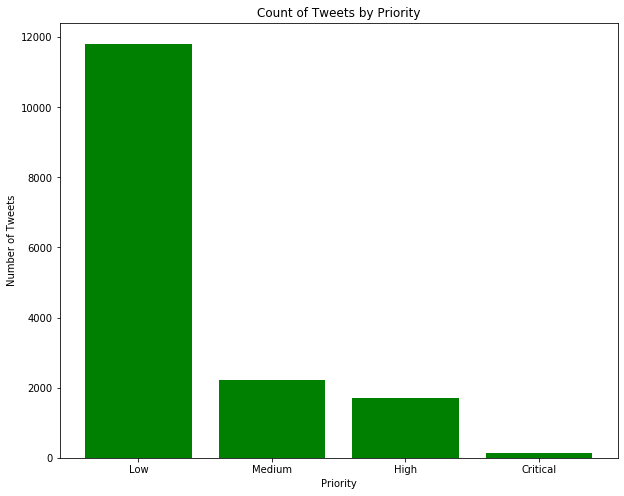

In [78]:
'''
    As predicted most tweets are of low prioity. Critical tweets are far and few. Unbalanced.
'''
plt.figure(figsize=(10,8))
plt.bar(s_priority.index, s_priority, color = 'g')
plt.xlabel('Priority')
plt.ylabel('Number of Tweets')
plt.title('Count of Tweets by Priority')

In [79]:
s_priority


Low         11815
Medium       2209
High         1712
Critical      129
Name: Priority, dtype: int64

In [80]:
'''
    We try to get the count of each type of decvice used to tweet. Not sure how it will be useful yet but
    I guess good to know.
    
    By far, the webclient, iphones and androids are the most popular. It also has to be noted that we have some
    tweets from non-twitter sources like Facebook and some other random websites.
    
    Tweet Deck is dashboard application by twitter to manage multiple twitter accounts.
'''
s_twc = df['Source'].str.contains('Twitter Web Client').apply(lambda x:x).value_counts()
s_tweetdeck = df['Source'].str.contains('TweetDeck').apply(lambda x:x).value_counts()
s_tw = df['Source'].str.contains('Twitter for Websites').apply(lambda x:x).value_counts()
s_tf = df['Source'].str.contains('twitterfeed').apply(lambda x:x).value_counts()
s_iphone = df['Source'].str.contains('Twitter for iPhone').apply(lambda x:x).value_counts()
s_android = df['Source'].str.contains('Twitter for Android').apply(lambda x:x).value_counts()
s_ipad = df['Source'].str.contains('Twitter for iPad').apply(lambda x:x).value_counts()
s_bb = df['Source'].str.contains('Twitter for BlackBerry').apply(lambda x:x).value_counts()
s_f = df['Source'].str.contains('Facebook').apply(lambda x:x).value_counts()

s_tw

False    15598
True       267
Name: Source, dtype: int64

In [81]:
source_type = ['Web Client', 'iPhone', 'Android', 'Twitter Feed', 'Facebook', 'Tweet Deck','iPad', 'BlackBerry', 'Websites']
source_count = [s_twc[1], s_iphone[1], s_android[1], s_tf[1], s_f[1], s_tweetdeck[1], s_ipad[1], s_bb[1], s_tw[1]]

Text(0.5, 1.0, 'Tweets Collected by Source')

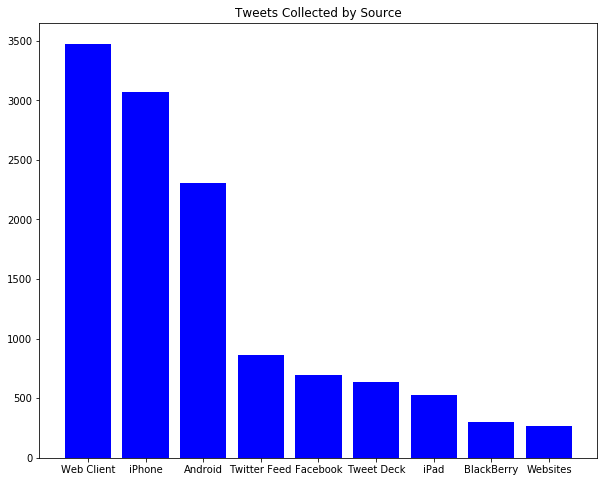

In [82]:
plt.figure(figsize=(10,8))
plt.bar(source_type, source_count, color = 'blue')
plt.title('Tweets Collected by Source')

In [83]:
'''
    We shall now look at the tweet counts by type of disaster. Attacks, bombings and school shootings are considered 
    separately despite having some commonalities in the nature of the disaster. 
    
    Most of the tweets are from earthquakes and the least are from tornadoes.
'''

event_type = ['Floods', 'Earthquake', 'Bushfire', 'Bombings', 'Tornado', 'Attack', 'SchoolShooting', 'typhoon' ]
event_count = {}
for element in event_type:
    counts = df['Event'].str.contains(element).apply(lambda x:x).value_counts()
    event_count[element] = counts[1]

event_count = sorted(event_count.items(), key=lambda kv: kv[1], reverse = True)
keys = []
val = []
for element in event_count:
    keys.append(element[0])
    val.append(element[1])
    

Text(0.5, 1.0, 'Tweets Collected by Disaster Type')

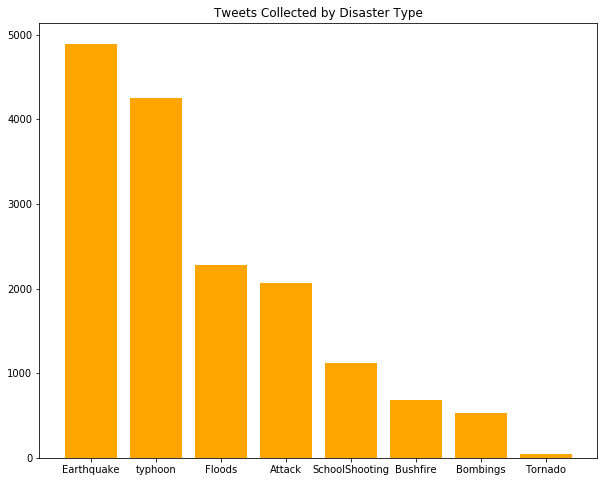

In [84]:
plt.figure(figsize=(10,8))
plt.bar(keys, val, color = 'orange')
plt.title('Tweets Collected by Disaster Type')

In [85]:
new_df = df[df['Event'].str.contains('Earthquake')]

In [86]:
'''
    Writing each type of disaster as a new csv file for feature extraction
'''
for element in event_type:
    new_df = df[df['Event'].str.contains(element)]
    new_df.to_csv(element+'_TREC_2018_test.csv')

In [87]:
a = np.array(df['Tweet'][df['Priority'] == 'Critical'])
len(a)

129

In [90]:
event_type = ['Floods', 'Earthquake', 'Bushfire', 'Bombings', 'Tornado', 'Attack', 'SchoolShooting', 'typhoon' ]
l = {}
for element in event_type:
    df_1 = df[((df['Priority'] == 'Critical')) & ((df['Event'].str.contains(element)))]
    l[element] = df_1.shape[0]
    
l = sorted(l.items(), key=lambda kv: kv[1], reverse = True)
key = []
values = []
for element in l:
    key.append(element[0])
    values.append(element[1])
    

Text(0.5, 1.0, 'Critical Tweets by Disaster Type Train - 2018')

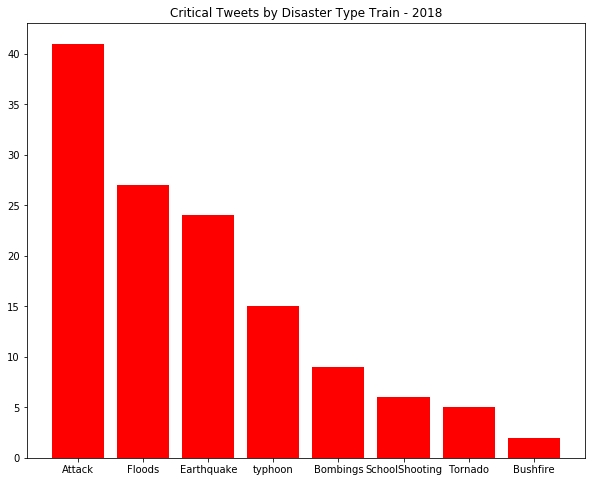

In [91]:
plt.figure(figsize=(10,8))
plt.bar(key, values, color = 'red')
plt.title('Critical Tweets by Disaster Type Train - 2018')

In [54]:
df['Event'].unique()

array(['albertaFloods2013', 'australiaBushfire2013', 'bostonBombings2013',
       'chileEarthquake2014', 'flSchoolShooting2018',
       'guatemalaEarthquake2012', 'italyEarthquakes2012',
       'joplinTornado2011', 'manilaFloods2013', 'nepalEarthquake2015',
       'parisAttacks2015', 'philipinnesFloods2012',
       'queenslandFloods2013', 'typhoonHagupit2014', 'typhoonYolanda2013'],
      dtype=object)

In [60]:
len(df['Categories'].unique())

1141